In [1]:
import numpy as np
import seaborn as sns;sns.set()

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 0-1化
from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis, FastICA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering, Birch, MeanShift
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix  # 计算准确率和混淆矩阵

from munkres import Munkres
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
dx = load_digits()   #读取数字数据，介绍如下
''' 
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
'''
xx = dx.data         #数据
yy = dx.target       #标签
d = 2                #设置需要降到的维数

## 降维：PCA、LDA、LLE、t-SNE、新增KelnelPCA、FastICA

In [3]:
# PCA
%time xxp = PCA(n_components = d).fit_transform(xx)
xxp = MinMaxScaler().fit_transform(xxp)

Wall time: 296 ms


In [4]:
# KernelPCA
%time xxkp = KernelPCA(n_components = d, kernel='rbf', gamma = 0.001).fit_transform(xx)
xxkp = MinMaxScaler().fit_transform(xxkp)

Wall time: 173 ms


In [5]:
# FastICA
%time xxi = FastICA(n_components = d).fit_transform(xx)
xxi = MinMaxScaler().fit_transform(xxi)

Wall time: 314 ms


In [6]:
# LDA 有监督
%time xxl = LinearDiscriminantAnalysis(n_components = d).fit_transform(xx,yy)
xxl = MinMaxScaler().fit_transform(xxl)

Wall time: 26 ms


D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [7]:
# LLE
%time xxlle = LocallyLinearEmbedding(n_components = d, n_neighbors = 10).fit_transform(xx)
xxlle = MinMaxScaler().fit_transform(xxlle)

Wall time: 766 ms


In [8]:
# t-SNE
%time xxt = TSNE(n_components = d, method = 'exact').fit_transform(xx)
xxt = MinMaxScaler().fit_transform(xxt)

# method 默认情况下d<4'barnes_hut'，method = 'exact'下d可任取，但计算复杂度高，速度慢。

Wall time: 2min 44s


2维可视化，其余跳过：

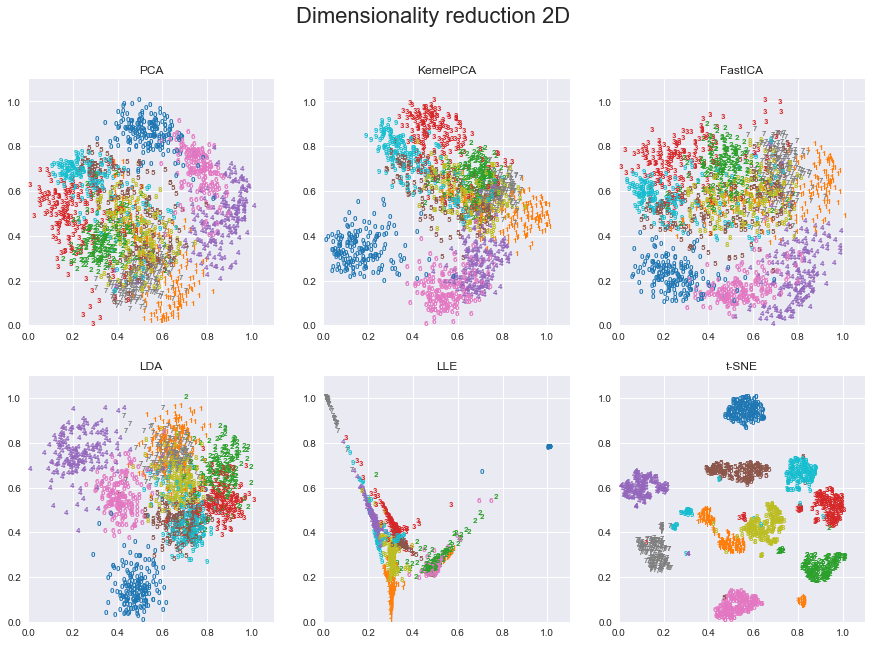

In [11]:
#2-D结果显示#
if d == 2:
    figure = plt.figure(figsize=(15, 10))
    ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
    ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
    ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
    ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
    ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
    ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')

    for i in range(1797):
        ax1.text(xxp[i,0],xxp[i,1],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
                fontdict = {'weight': 'bold', 'size': 8})
        ax2.text(xxkp[i,0],xxkp[i,1],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
                fontdict = {'weight': 'bold', 'size': 8})
        ax3.text(xxi[i,0],xxi[i,1],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
                fontdict = {'weight': 'bold', 'size': 8})
        ax4.text(xxl[i, 0], xxl[i, 1], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
                 fontdict = {'weight': 'bold', 'size': 8})
        ax5.text(xxlle[i, 0], xxlle[i, 1], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
                 fontdict = {'weight': 'bold', 'size': 8})
        ax6.text(xxt[i, 0], xxt[i, 1], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
                 fontdict = {'weight': 'bold', 'size': 8})


    ax1.set_title("PCA")
    ax1.set_xlim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax1.set_ylim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax2.set_title("KernelPCA")
    ax2.set_xlim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax2.set_ylim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax3.set_title("FastICA")
    ax3.set_xlim(xxi.min() * 1.1, xxi.max() * 1.1)
    ax3.set_ylim(xxi.min() * 1.1, xxi.max() * 1.1)
    ax4.set_title("LDA")
    ax4.set_xlim(xxl.min() * 1.1, xxl.max() * 1.1)
    ax4.set_ylim(xxl.min() * 1.1, xxl.max() * 1.1)
    ax5.set_title("LLE")
    ax5.set_xlim(xxlle.min() * 1.1, xxlle.max() * 1.1)
    ax5.set_ylim(xxlle.min() * 1.1, xxlle.max() * 1.1)
    ax6.set_title("t-SNE")
    ax6.set_xlim(xxt.min() * 1.1, xxt.max() * 1.1)
    ax6.set_ylim(xxt.min() * 1.1, xxt.max() * 1.1)


    figure.suptitle('Dimensionality reduction 2D', fontsize=22)
    plt.show()

3维可视化，其余跳过：

In [ ]:
#3-D结果显示#
if d == 3:
    figure = plt.figure(figsize=(15, 10))
    ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal', projection='3d')
    ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal', projection='3d')
    ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal', projection='3d')
    ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal', projection='3d')
    ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal', projection='3d')
    ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal', projection='3d')

    for i in range(1797):
        ax1.text(xxp[i,0],xxp[i,1],xxp[i, 2],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
                fontdict = {'weight': 'bold', 'size': 8})
        ax2.text(xxkp[i,0],xxkp[i,1],xxkp[i, 2],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
                fontdict = {'weight': 'bold', 'size': 8})
        ax3.text(xxi[i,0],xxi[i,1],xxi[i, 2],str(yy[i]),color=plt.cm.tab10(yy[i]/10),
                fontdict = {'weight': 'bold', 'size': 8})
        ax4.text(xxl[i, 0], xxl[i, 1],xxl[i, 2], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
                 fontdict = {'weight': 'bold', 'size': 8})
        ax5.text(xxlle[i, 0], xxlle[i, 1],xxlle[i, 2], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
                 fontdict = {'weight': 'bold', 'size': 8})
        ax6.text(xxt[i, 0], xxt[i, 1],xxt[i, 2], str(yy[i]), color=plt.cm.tab10(yy[i]/10),
                 fontdict = {'weight': 'bold', 'size': 8})


    ax1.set_title("PCA")
    ax1.set_xlim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax1.set_ylim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax2.set_title("KernelPCA")
    ax2.set_xlim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax2.set_ylim(xxp.min() * 1.1, xxp.max() * 1.1)
    ax3.set_title("FastICA")
    ax3.set_xlim(xxi.min() * 1.1, xxi.max() * 1.1)
    ax3.set_ylim(xxi.min() * 1.1, xxi.max() * 1.1)
    ax4.set_title("LDA")
    ax4.set_xlim(xxl.min() * 1.1, xxl.max() * 1.1)
    ax4.set_ylim(xxl.min() * 1.1, xxl.max() * 1.1)
    ax5.set_title("LLE")
    ax5.set_xlim(xxlle.min() * 1.1, xxlle.max() * 1.1)
    ax5.set_ylim(xxlle.min() * 1.1, xxlle.max() * 1.1)
    ax6.set_title("t-SNE")
    ax6.set_xlim(xxt.min() * 1.1, xxt.max() * 1.1)
    ax6.set_ylim(xxt.min() * 1.1, xxt.max() * 1.1)


    figure.suptitle('Dimensionality reduction 3D', fontsize=22)
    plt.show()

## 聚类：K-means、DBSCAN、Hierarchical Clustering、Birch

In [12]:
# 对齐聚类标签和实际标签
def predict_transfer(label, predict):
    # L1 should be the labels and L2 should be the clustering number we got
    L1 = np.array(label)
    L2 = np.array(predict)
    Label1 = np.unique(L1)
    nClass1 = len(Label1)
    Label2 = np.unique(L2)
    nClass2 = len(Label2)
    nClass = np.maximum(nClass1,nClass2)
    G = np.zeros((nClass,nClass))
    for i in range(nClass1):
        ind_cla1 = L1 == Label1[i]
        ind_cla1 = ind_cla1.astype(float)
        for j in range(nClass2):
            ind_cla2 = L2 == Label2[j]
            ind_cla2 = ind_cla2.astype(float)
            G[i,j] = np.sum(ind_cla2 * ind_cla1)
    m = Munkres()
    index = m.compute(-G.T)
    index = np.array(index)
    c = index[:,1]
    newL2 = np.zeros(L2.shape)
    for i in range(nClass2):
        newL2[L2 == Label2[i]] = Label1[c[i]]
    return newL2

In [13]:
# 混淆矩阵绘图
def draw_confusionmatix(label, predict):
    sns.heatmap(confusion_matrix(label, predict).T, square=True, annot=True, fmt='d', cbar=False,cmap = 'rainbow')
    plt.xlabel('true label')
    plt.ylabel('predicted label')

In [14]:
# K-means
kmeans = KMeans(n_clusters = 10, n_jobs = -1)

yyk_p = kmeans.fit_predict(xxp)
yyk_p = predict_transfer(yy, yyk_p)
acck_p = accuracy_score(yy,yyk_p)

yyk_kp = kmeans.fit_predict(xxkp)
yyk_kp = predict_transfer(yy, yyk_kp)
acck_kp = accuracy_score(yy,yyk_kp)

yyk_i = kmeans.fit_predict(xxi)
yyk_i = predict_transfer(yy, yyk_i)
acck_i = accuracy_score(yy,yyk_i)

yyk_l = kmeans.fit_predict(xxl)
yyk_l = predict_transfer(yy, yyk_l)
acck_l = accuracy_score(yy,yyk_l)

yyk_lle = kmeans.fit_predict(xxlle)
yyk_lle = predict_transfer(yy, yyk_lle)
acck_lle = accuracy_score(yy,yyk_lle)

yyk_t = kmeans.fit_predict(xxt)
yyk_t = predict_transfer(yy, yyk_t)
acck_t = accuracy_score(yy,yyk_t)

print("PCA_acc: %f\nKernelPCA_acc: %f\nFastICA_acc: %f\nLDA_acc: %f\nLLE_acc: %f\nt-SNE_acc: %f" 
      %(acck_p,acck_kp,acck_i,acck_l,acck_lle,acck_t))

PCA_acc: 0.622705
KernelPCA_acc: 0.647746
FastICA_acc: 0.619922
LDA_acc: 0.656093
LLE_acc: 0.687257
t-SNE_acc: 0.940456


In [15]:
score_p = kmeans.score(xxp)
score_kp = kmeans.score(xxkp)
score_l = kmeans.score(xxl)
score_i = kmeans.score(xxi)
score_lle = kmeans.score(xxlle)
score_t = kmeans.score(xxt)

print(score_p,score_kp,score_l,score_i,score_lle,score_t)

-27.790148505408165 -27.95530841379285 -27.670611537412807 -29.595622802893217 -66.4608143457526 -9.26847992092371


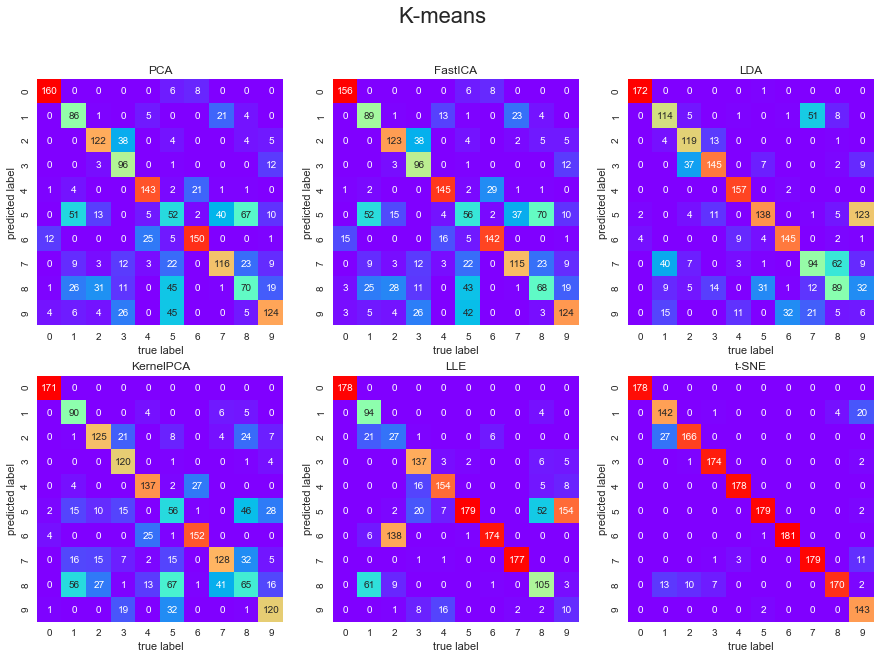

In [16]:
figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
draw_confusionmatix(yy, yyk_p)

ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
draw_confusionmatix(yy, yyk_i)

ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
draw_confusionmatix(yy, yyk_l)

ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
draw_confusionmatix(yy, yyk_kp)

ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
draw_confusionmatix(yy, yyk_lle)

ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')
draw_confusionmatix(yy, yyk_t)

ax1.set_title("PCA")
ax2.set_title("FastICA")
ax3.set_title("LDA")
ax4.set_title("KernelPCA")
ax5.set_title("LLE")
ax6.set_title("t-SNE")


figure.suptitle('K-means', fontsize = 22)
plt.show()

In [32]:
# Spectral Clustering
sc = SpectralClustering(n_clusters=10)


yys_p = sc.fit_predict(xxp)
yys_p = predict_transfer(yy, yys_p)
accs_p = accuracy_score(yy,yys_p)

yys_kp = sc.fit_predict(xxkp)
yys_kp = predict_transfer(yy, yys_kp)
accs_kp = accuracy_score(yy,yys_kp)

yys_i = sc.fit_predict(xxi)
yys_i = predict_transfer(yy, yys_i)
accs_i = accuracy_score(yy,yys_i)

yys_l = sc.fit_predict(xxl)
yys_l = predict_transfer(yy, yys_l)
accs_l = accuracy_score(yy,yys_l)

yys_lle = sc.fit_predict(xxlle)
yys_lle = predict_transfer(yy, yys_lle)
accs_lle = accuracy_score(yy,yys_lle)

yys_t = sc.fit_predict(xxt)
yys_t = predict_transfer(yy, yys_t)
accs_t = accuracy_score(yy,yys_t)

print("PCA_acc: %f\nKernelPCA_acc: %f\nFastICA_acc: %f\nLDA_acc: %f\nLLE_acc: %f\nt-SNE_acc: %f" 
      %(accs_p,accs_kp,accs_i,accs_l,accs_lle,accs_t))

PCA_acc: 0.499722
KernelPCA_acc: 0.520868
FastICA_acc: 0.480801
LDA_acc: 0.579855
LLE_acc: 0.629382
t-SNE_acc: 0.934335


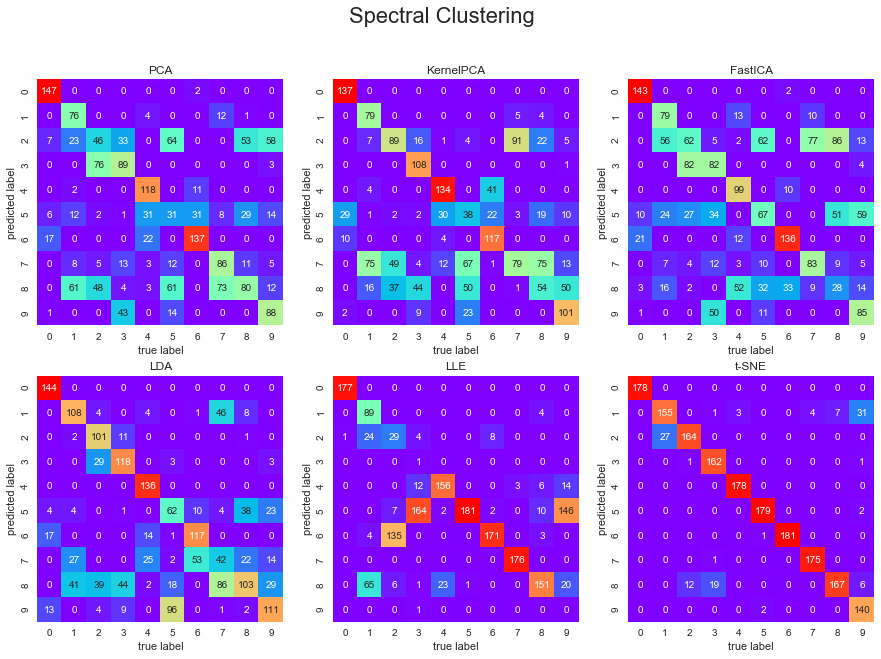

In [33]:
figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
draw_confusionmatix(yy, yys_p)

ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
draw_confusionmatix(yy, yys_kp)

ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
draw_confusionmatix(yy, yys_i)

ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
draw_confusionmatix(yy, yys_l)

ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
draw_confusionmatix(yy, yys_lle)

ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')
draw_confusionmatix(yy, yys_t)

ax1.set_title("PCA")
ax2.set_title("KernelPCA")
ax3.set_title("FastICA")
ax4.set_title("LDA")
ax5.set_title("LLE")
ax6.set_title("t-SNE")


figure.suptitle('Spectral Clustering', fontsize = 22)
plt.show()

In [34]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=10)


yyh_p = hc.fit_predict(xxp)
yyh_p = predict_transfer(yy, yyh_p)
acch_p = accuracy_score(yy,yyh_p)

yyh_kp = hc.fit_predict(xxkp)
yyh_kp = predict_transfer(yy, yyh_kp)
acch_kp = accuracy_score(yy,yyh_kp)

yyh_i = hc.fit_predict(xxi)
yyh_i = predict_transfer(yy, yyh_i)
acch_i = accuracy_score(yy,yyh_i)

yyh_l = hc.fit_predict(xxl)
yyh_l = predict_transfer(yy, yyh_l)
acch_l = accuracy_score(yy,yyh_l)

yyh_lle = hc.fit_predict(xxlle)
yyh_lle = predict_transfer(yy, yyh_lle)
acch_lle = accuracy_score(yy,yyh_lle)

yyh_t = hc.fit_predict(xxt)
yyh_t = predict_transfer(yy, yyh_t)
acch_t = accuracy_score(yy,yyh_t)

print("PCA_acc: %f\nKernelPCA_acc: %f\nFastICA_acc: %f\nLDA_acc: %f\nLLE_acc: %f\nt-SNE_acc: %f" 
      %(acch_p,acch_kp,acch_i,acch_l,acch_lle,acch_t))

PCA_acc: 0.510295
KernelPCA_acc: 0.624374
FastICA_acc: 0.601558
LDA_acc: 0.685587
LLE_acc: 0.727880
t-SNE_acc: 0.889816


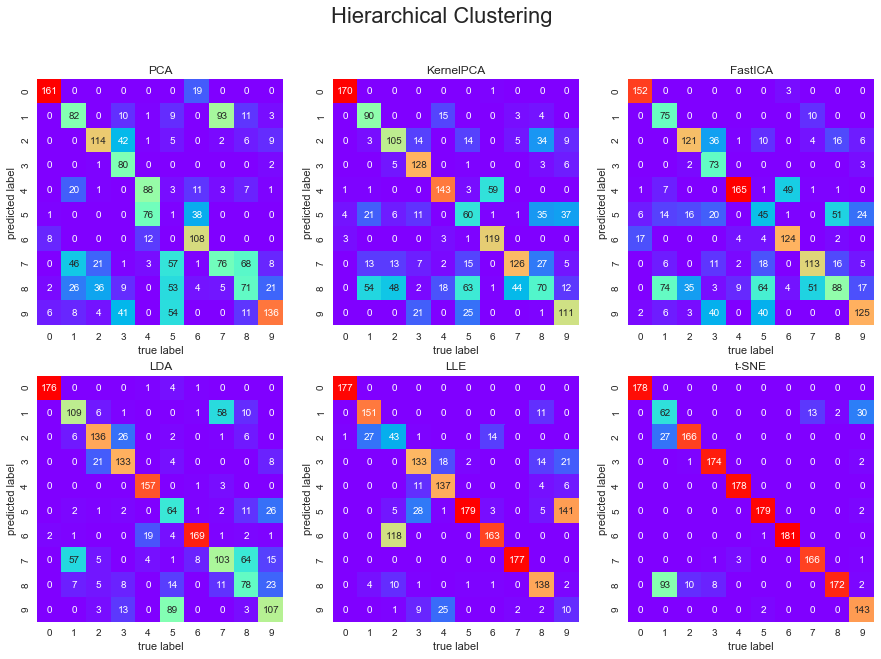

In [35]:
figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
draw_confusionmatix(yy, yyh_p)

ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
draw_confusionmatix(yy, yyh_kp)

ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
draw_confusionmatix(yy, yyh_i)

ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
draw_confusionmatix(yy, yyh_l)

ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
draw_confusionmatix(yy, yyh_lle)

ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')
draw_confusionmatix(yy, yyh_t)

ax1.set_title("PCA")
ax2.set_title("KernelPCA")
ax3.set_title("FastICA")
ax4.set_title("LDA")
ax5.set_title("LLE")
ax6.set_title("t-SNE")


figure.suptitle('Hierarchical Clustering', fontsize = 22)
plt.show()

In [38]:
# Birch
bir = Birch(n_clusters = 10, threshold=0.01)


yyb_p = bir.fit_predict(xxp)
yyb_p = predict_transfer(yy, yyb_p)
accb_p = accuracy_score(yy,yyb_p)

yyb_kp = bir.fit_predict(xxkp)
yyb_kp = predict_transfer(yy, yyb_kp)
accb_kp = accuracy_score(yy,yyb_kp)

yyb_i = bir.fit_predict(xxi)
yyb_i = predict_transfer(yy, yyb_i)
accb_i = accuracy_score(yy,yyb_i)

yyb_l = bir.fit_predict(xxl)
yyb_l = predict_transfer(yy, yyb_l)
accb_l = accuracy_score(yy,yyb_l)

yyb_lle = bir.fit_predict(xxlle)
yyb_lle = predict_transfer(yy, yyb_lle)
accb_lle = accuracy_score(yy,yyb_lle)

yyb_t = bir.fit_predict(xxt)
yyb_t = predict_transfer(yy, yyb_t)
accb_t = accuracy_score(yy,yyb_t)

print("PCA_acc: %f\nKernelPCA_acc: %f\nFastICA_acc: %f\nLDA_acc: %f\nLLE_acc: %f\nt-SNE_acc: %f" 
      %(accb_p,accb_kp,accb_i,accb_l,accb_lle,accb_t))

D:\Anaconda\lib\site-packages\sklearn\cluster\birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


PCA_acc: 0.495826
KernelPCA_acc: 0.547579
FastICA_acc: 0.501948
LDA_acc: 0.605454
LLE_acc: 0.602671
t-SNE_acc: 0.941569


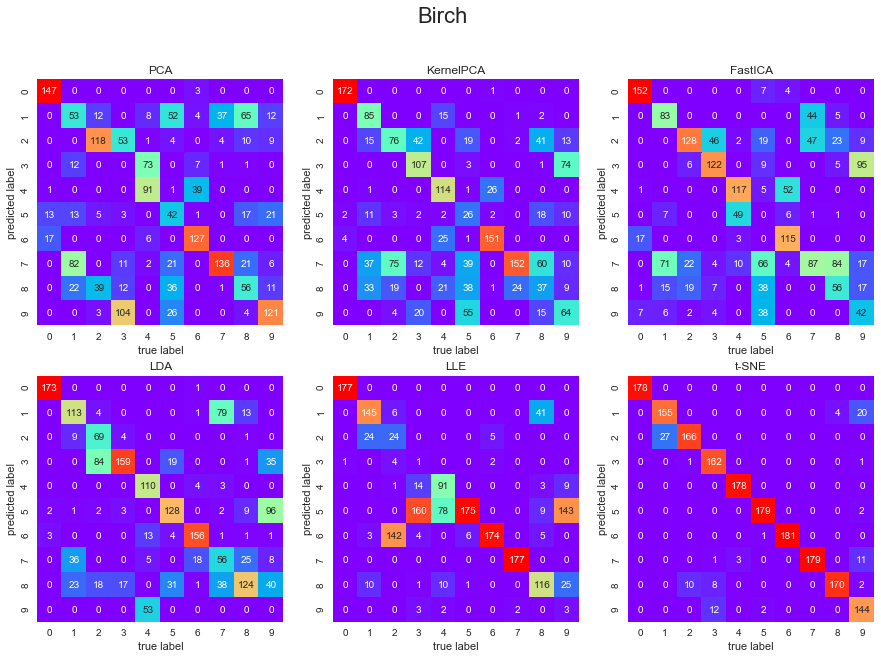

In [39]:
figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
draw_confusionmatix(yy, yyb_p)

ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
draw_confusionmatix(yy, yyb_kp)

ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
draw_confusionmatix(yy, yyb_i)

ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
draw_confusionmatix(yy, yyb_l)

ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
draw_confusionmatix(yy, yyb_lle)

ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')
draw_confusionmatix(yy, yyb_t)

ax1.set_title("PCA")
ax2.set_title("KernelPCA")
ax3.set_title("FastICA")
ax4.set_title("LDA")
ax5.set_title("LLE")
ax6.set_title("t-SNE")


figure.suptitle('Birch', fontsize = 22)
plt.show()

In [30]:
# DBSCAN
db = DBSCAN(eps = 0.07, min_samples = 50)


yyd_p = db.fit_predict(xxp)
yyd_p = predict_transfer(yy, yyd_p)
accd_p = accuracy_score(yy,yyd_p)

yyd_kp = db.fit_predict(xxkp)
yyd_kp = predict_transfer(yy, yyd_kp)
accd_kp = accuracy_score(yy,yyd_kp)

yyd_i = db.fit_predict(xxi)
yyd_i = predict_transfer(yy, yyd_i)
accd_i = accuracy_score(yy,yyd_i)

yyd_l = db.fit_predict(xxl)
yyd_l = predict_transfer(yy, yyd_l)
accd_l = accuracy_score(yy,yyd_l)

yyd_lle = db.fit_predict(xxlle)
yyd_lle = predict_transfer(yy, yyd_lle)
accd_lle = accuracy_score(yy,yyd_lle)

yyd_t = db.fit_predict(xxt)
yyd_t = predict_transfer(yy, yyd_t)
accd_t = accuracy_score(yy,yyd_t)

print("PCA_acc: %f\nKernelPCA_acc: %f\nFastICA_acc: %f\nLDA_acc: %f\nLLE_acc: %f\nt-SNE_acc: %f" 
      %(accd_p,accd_kp,accd_i,accd_l,accd_lle,accd_t))

PCA_acc: 0.264329
KernelPCA_acc: 0.185309
FastICA_acc: 0.323317
LDA_acc: 0.334446
LLE_acc: 0.301057
t-SNE_acc: 0.799110


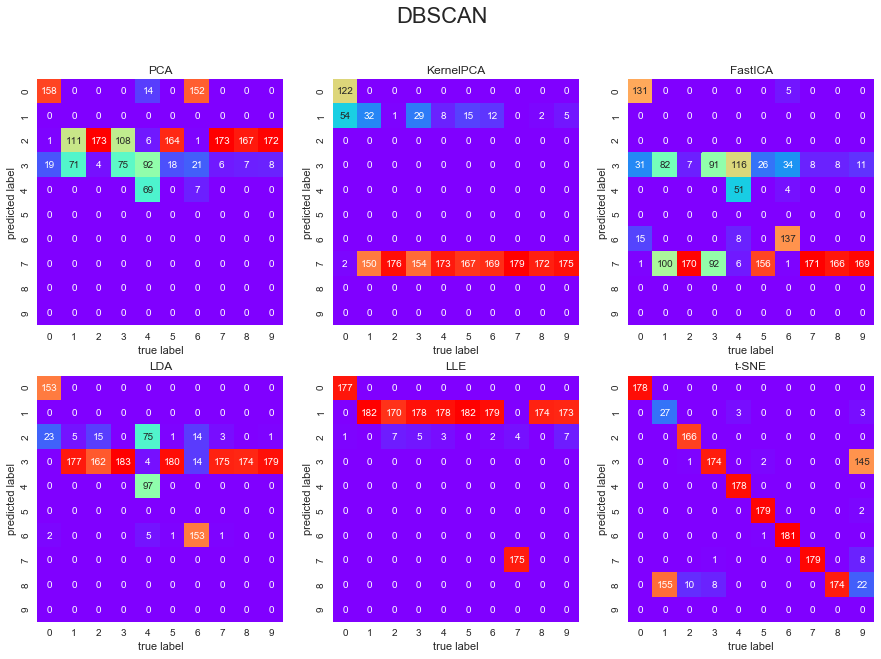

In [31]:
figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
draw_confusionmatix(yy, yyd_p)

ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
draw_confusionmatix(yy, yyd_kp)

ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
draw_confusionmatix(yy, yyd_i)

ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
draw_confusionmatix(yy, yyd_l)

ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
draw_confusionmatix(yy, yyd_lle)

ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')
draw_confusionmatix(yy, yyd_t)

ax1.set_title("PCA")
ax2.set_title("KernelPCA")
ax3.set_title("FastICA")
ax4.set_title("LDA")
ax5.set_title("LLE")
ax6.set_title("t-SNE")


figure.suptitle('DBSCAN', fontsize = 22)
plt.show()

In [37]:
# MeanShift
ms = MeanShift(bandwidth = 0.1)


yym_p = ms.fit_predict(xxp)
yym_p = predict_transfer(yy, yym_p)
accm_p = accuracy_score(yy,yym_p)

yym_kp = ms.fit_predict(xxkp)
yym_kp = predict_transfer(yy, yym_kp)
accm_kp = accuracy_score(yy,yym_kp)

yym_i = ms.fit_predict(xxi)
yym_i = predict_transfer(yy, yym_i)
accm_i = accuracy_score(yy,yym_i)

yym_l = ms.fit_predict(xxl)
yym_l = predict_transfer(yy, yym_l)
accm_l = accuracy_score(yy,yym_l)

yym_lle = ms.fit_predict(xxlle)
yym_lle = predict_transfer(yy, yym_lle)
accm_lle = accuracy_score(yy,yym_lle)

yym_t = ms.fit_predict(xxt)
yym_t = predict_transfer(yy, yym_t)
accm_t = accuracy_score(yy,yym_t)

print("PCA_acc: %f\nKernelPCA_acc: %f\nFastICA_acc: %f\nLDA_acc: %f\nLLE_acc: %f\nt-SNE_acc: %f" 
      %(accm_p,accm_kp,accm_i,accm_l,accm_lle,accm_t))

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
figure = plt.figure(figsize=(15, 10))
ax1 = figure.add_subplot(2, 3, 1, aspect = 'equal')
draw_confusionmatix(yy, yym_p)

ax2 = figure.add_subplot(2, 3, 2, aspect = 'equal')
draw_confusionmatix(yy, yym_kp)

ax3 = figure.add_subplot(2, 3, 3, aspect = 'equal')
draw_confusionmatix(yy, yym_i)

ax4 = figure.add_subplot(2, 3, 4, aspect = 'equal')
draw_confusionmatix(yy, yym_l)

ax5 = figure.add_subplot(2, 3, 5, aspect = 'equal')
draw_confusionmatix(yy, yym_lle)

ax6 = figure.add_subplot(2, 3, 6, aspect = 'equal')
draw_confusionmatix(yy, yym_t)

ax1.set_title("PCA")
ax2.set_title("KernelPCA")
ax3.set_title("FastICA")
ax4.set_title("LDA")
ax5.set_title("LLE")
ax6.set_title("t-SNE")


figure.suptitle('MeanShift', fontsize = 22)
plt.show()

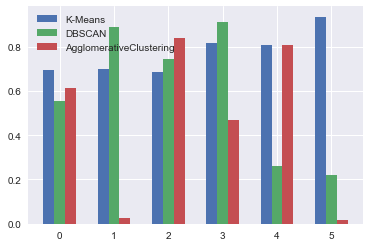

In [40]:
size = 6

a = [0.694491,0.700612,0.685031,0.815804,0.805231,0.934891]   #d=3
b = np.random.random(size)
c = np.random.random(size)
d = np.random.random(size)
x = np.arange(size)

total_width, n = 0.6, 3     # 有多少个类型，只需更改n即可
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='K-Means')
plt.bar(x + width, b, width=width, label='DBSCAN')
plt.bar(x + 2 * width, c, width=width, label='AgglomerativeClustering')

plt.legend()
plt.show()